# Multi Level Perceptron (MLP)


# Exercise
This exercise is about showing the powerful non-linear decision surface (or line in 2D 
problems) of a trained MLP. As seen in the XOR case a lot of classification problems cannot be solved with a 
linear classifier as the perceptron or the linear Support Vector machine (SVM). 

Please follow the following steps.
1. Use the data set in the $perceptron0.ipnb$ notebook as a basis.
2. Extend it with few samples such that it cannot be separated linearly.
3. Use a simple MLP with 2 neurons in the hidden layer, check http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    for details.
4. Use the 2D mesh grid to visualise the decision surface.
5. Extent the data set with even more difficult to separate samples and increase the number 
of hidden neurons to solve this. Again use the 2D mesh grid to visualise the results. Why is this in general not 
a good idea?


Exercise 1: Use the data set in the $perceptron0.ipnb$ notebook as a basis.

In [1]:
#importing needed libraries
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

### Data set

X type:  <class 'numpy.ndarray'> , X dimensions:  (14, 2)
y type:  <class 'numpy.ndarray'> , y dimensions:  (14,)


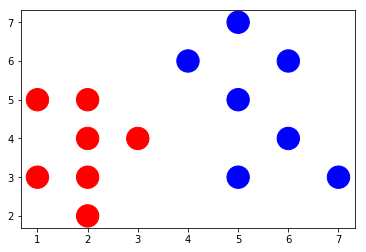

In [6]:
# Data
d = np.array([
[2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5],
[2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7]
])
 
# Labels
t = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])
d90 = np.rot90(d)
d180 = np.rot90(d90)
d270 = np.rot90(d180)

#check dimensions
print("X type: ", type(d270), ", X dimensions: ", d270.shape)
print("y type: ", type(t), ", y dimensions: ", t.shape)

# Plot
colormap = np.array(['r', 'b'])
plt.scatter(d[0], d[1], c=colormap[t], s=500)

### Set up and Train MLP

In [8]:
#2 neurons for the hidden layer, fully connected
#activation function: 'relu', but could be 'tanh' as well. Sigmoid function 'logistic' is not working here
#verbose = True stands for showing iteration steps
mlp = MLPClassifier(hidden_layer_sizes=(2,), verbose=True, activation='tanh', 
                    learning_rate_init = 0.08, random_state=1)
#training the model
mlp.fit(d270, t)

Iteration 1, loss = 0.69726285
Iteration 2, loss = 0.66021384
Iteration 3, loss = 0.63818508
Iteration 4, loss = 0.62193636
Iteration 5, loss = 0.60129123
Iteration 6, loss = 0.56896285
Iteration 7, loss = 0.52941035
Iteration 8, loss = 0.48528069
Iteration 9, loss = 0.45367963
Iteration 10, loss = 0.44217803
Iteration 11, loss = 0.43884683
Iteration 12, loss = 0.42735010
Iteration 13, loss = 0.40835780
Iteration 14, loss = 0.38624135
Iteration 15, loss = 0.36391449
Iteration 16, loss = 0.34166065
Iteration 17, loss = 0.32314808
Iteration 18, loss = 0.30990601
Iteration 19, loss = 0.29612628
Iteration 20, loss = 0.28418292
Iteration 21, loss = 0.27080890
Iteration 22, loss = 0.25173862
Iteration 23, loss = 0.23276962
Iteration 24, loss = 0.21487144
Iteration 25, loss = 0.19779070
Iteration 26, loss = 0.18464532
Iteration 27, loss = 0.17082673
Iteration 28, loss = 0.15621809
Iteration 29, loss = 0.14249482
Iteration 30, loss = 0.12785943
Iteration 31, loss = 0.11491564
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.08, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [9]:
print('Absolute training score:', mlp.score(d270, t))
print('predictions:', mlp.predict(d270)) 
print('expected:', t)

Absolute training score: 1.0
predictions: [0 0 0 1 1 0 0 1 0 0 1 1 1 1]
expected: [0 0 0 1 1 0 0 1 0 0 1 1 1 1]


### Interrogate the trained network

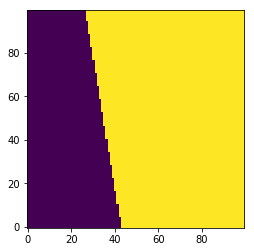

In [10]:
#Create a 2D mesh and interrogate the trained network
PITCH = 0.1
x = np.arange(0, 10, PITCH)
y = np.arange(0, 10, PITCH)
#print(x)
crds = np.meshgrid(x, y, sparse=False, indexing='ij')
flatX = np.ravel(crds[0])
flatY = np.ravel(crds[1])
test = np.column_stack((flatX,flatY))
plt.imshow(mlp.predict(test).reshape((100,100)), origin = 'lower')

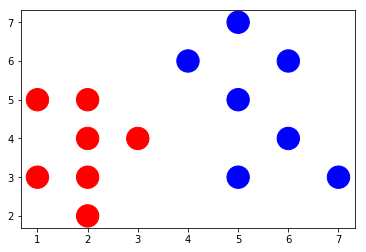

In [11]:
# Plot
colormap = np.array(['r', 'b'])
plt.scatter(d[0], d[1], c=colormap[t], s=500)

## Exercise 2. Extend it with few samples such that it cannot be separated linearly.


X type:  <class 'numpy.ndarray'> , X dimensions:  (15, 2)
y type:  <class 'numpy.ndarray'> , y dimensions:  (15,)


ValueError: 'c' argument has 14 elements, which is not acceptable for use with 'x' with size 15, 'y' with size 15.

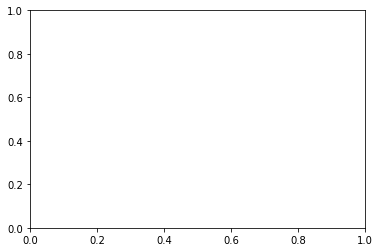

In [14]:
# Add new RED sample inside data
dnew = np.array([
[2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5, 5],              # new coord (5,4)
[2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 4]
])
 
# Labels
tnew = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]) # and has red label ==0
dnew90 = np.rot90(dnew)
dnew180 = np.rot90(dnew90)
dnew270 = np.rot90(dnew180)

#check dimensions
print("X type: ", type(dnew270), ", X dimensions: ", dnew270.shape)
print("y type: ", type(tnew), ", y dimensions: ", tnew.shape)

# Plot
colormap = np.array(['r', 'b'])
plt.scatter(dnew[0], dnew[1], c=colormap[t], s=500)

## Exercise 3. Use a simple MLP with 2 neurons in the hidden layer

### Set up and Train MLP with just 2 neurons in the hidden layer

In [9]:
#2 neurons for the hidden layer, fully connected
#activation function: 'relu', but could be 'tanh' as well. Sigmoid function 'logistic' is not working here
#verbose = True stands for showing iteration steps
mlpnew = MLPClassifier(hidden_layer_sizes=(2,), verbose=True, activation='tanh', 
                    learning_rate_init = 0.08, random_state=1)
#training the model
mlpnew.fit(dnew270, tnew)

print('Absolute training score:', mlp.score(dnew270, tnew))
print('predictions:', mlp.predict(dnew270)) 
print('expected:', tnew)

Iteration 1, loss = 0.73674069
Iteration 2, loss = 0.68788749
Iteration 3, loss = 0.66170865
Iteration 4, loss = 0.65593570
Iteration 5, loss = 0.65118241
Iteration 6, loss = 0.63824888
Iteration 7, loss = 0.61684264
Iteration 8, loss = 0.59199020
Iteration 9, loss = 0.57450991
Iteration 10, loss = 0.56112187
Iteration 11, loss = 0.53527123
Iteration 12, loss = 0.51303451
Iteration 13, loss = 0.50457134
Iteration 14, loss = 0.50370783
Iteration 15, loss = 0.49246947
Iteration 16, loss = 0.47687067
Iteration 17, loss = 0.46885318
Iteration 18, loss = 0.46470964
Iteration 19, loss = 0.45772121
Iteration 20, loss = 0.44501168
Iteration 21, loss = 0.42678669
Iteration 22, loss = 0.41011145
Iteration 23, loss = 0.40260114
Iteration 24, loss = 0.39650011
Iteration 25, loss = 0.38495790
Iteration 26, loss = 0.37306116
Iteration 27, loss = 0.36578903
Iteration 28, loss = 0.35724904
Iteration 29, loss = 0.34374430
Iteration 30, loss = 0.33197171
Iteration 31, loss = 0.32466922
Iteration 32, los

C:\Users\Jan\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


## Exercise 4. Use the 2D mesh grid to visualise the decision surface.

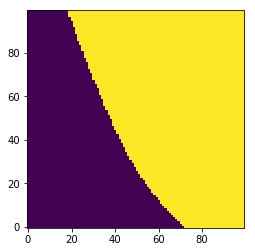

In [10]:
#Create a 2D mesh and interrogate the trained network
PITCH = 0.1
x = np.arange(0, 10, PITCH)
y = np.arange(0, 10, PITCH)
#print(x)
crds = np.meshgrid(x, y, sparse=False, indexing='ij')
flatX = np.ravel(crds[0])
flatY = np.ravel(crds[1])
test = np.column_stack((flatX,flatY))
plt.imshow(mlpnew.predict(test).reshape((100,100)), origin = 'lower')

## Exercise 5. Extent the data set with even more difficult to separate samples and increase the number of hidden neurons to solve this. Why is this in general not a good idea?

Iteration 1, loss = 0.88686206
Iteration 2, loss = 0.69779171
Iteration 3, loss = 0.62231623
Iteration 4, loss = 0.64007630
Iteration 5, loss = 0.62837163
Iteration 6, loss = 0.57898367
Iteration 7, loss = 0.52602683
Iteration 8, loss = 0.49825994
Iteration 9, loss = 0.50210993
Iteration 10, loss = 0.50298769
Iteration 11, loss = 0.48282652
Iteration 12, loss = 0.44740696
Iteration 13, loss = 0.41128056
Iteration 14, loss = 0.39123913
Iteration 15, loss = 0.38942641
Iteration 16, loss = 0.38287862
Iteration 17, loss = 0.35905708
Iteration 18, loss = 0.33236413
Iteration 19, loss = 0.31828912
Iteration 20, loss = 0.31484111
Iteration 21, loss = 0.31212087
Iteration 22, loss = 0.30459079
Iteration 23, loss = 0.29334187
Iteration 24, loss = 0.28287929
Iteration 25, loss = 0.27684526
Iteration 26, loss = 0.27396045
Iteration 27, loss = 0.26940663
Iteration 28, loss = 0.26212283
Iteration 29, loss = 0.25604658
Iteration 30, loss = 0.25336538
Iteration 31, loss = 0.25209691
Iteration 32, los

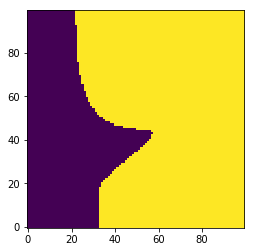

In [13]:
#5 neurons for the hidden layer, fully connected
#activation function: 'relu', but could be 'tanh' as well. Sigmoid function 'logistic' is not working here
#verbose = True stands for showing iteration steps
mlpnew = MLPClassifier(hidden_layer_sizes=(5,), verbose=True, activation='tanh', 
                    learning_rate_init = 0.08, random_state=1)
#training the model
mlpnew.fit(dnew270, tnew)

print('Absolute training score:', mlp.score(dnew270, tnew))
print('predictions:', mlp.predict(dnew270)) 
print('expected:', tnew)

#Create a 2D mesh and interrogate the trained network
PITCH = 0.1
x = np.arange(0, 10, PITCH)
y = np.arange(0, 10, PITCH)
#print(x)
crds = np.meshgrid(x, y, sparse=False, indexing='ij')
flatX = np.ravel(crds[0])
flatY = np.ravel(crds[1])
test = np.column_stack((flatX,flatY))
plt.imshow(mlpnew.predict(test).reshape((100,100)), origin = 'lower')

### Because it eliminates the quest for genericity; it is now *perhaps* trained on this data set (kind of overtraining)!